In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Purchase Behaviour and Transaction Data**

In [3]:
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

**Purchase Behaviour Data**

In [5]:
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


**Transaction Data**

In [6]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


**Display basic info about both datasets**

In [7]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**Check for missing values in both datasets**

In [9]:
purchase_behaviour.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

**Identifying outliers in the TOT_SALES and PROD_QTY columns .Using IQR (Interquartile Range) method to detect outliers**

In [11]:
Q1_qty = transaction_data['PROD_QTY'].quantile(0.25)
Q3_qty = transaction_data['PROD_QTY'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
outliers_qty = transaction_data[(transaction_data['PROD_QTY'] < (Q1_qty - 1.5 * IQR_qty)) | 
                                (transaction_data['PROD_QTY'] > (Q3_qty + 1.5 * IQR_qty))]


In [12]:
Q1_sales = transaction_data['TOT_SALES'].quantile(0.25)
Q3_sales = transaction_data['TOT_SALES'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
outliers_sales = transaction_data[(transaction_data['TOT_SALES'] < (Q1_sales - 1.5 * IQR_sales)) | 
                                  (transaction_data['TOT_SALES'] > (Q3_sales + 1.5 * IQR_sales))]

In [13]:
outliers_qty

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264754,43380,268,268396,264841,8,Smiths Crinkle Cut Chips Original 170g,1,2.9
264755,43395,268,268463,264916,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8
264756,43583,268,268491,264947,56,Cheezels Cheese Box 125g,1,2.1
264824,43537,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6


In [14]:
outliers_sales

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
11,43332,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
56,43601,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5
72,43331,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5
100,43605,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0
...,...,...,...,...,...,...,...,...
258715,43328,194,194381,194835,102,Kettle Mozzarella Basil & Pesto 175g,4,21.6
258721,43327,200,200248,199694,3,Kettle Sensations Camembert & Fig 150g,4,18.4
258726,43332,203,203253,203360,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
258729,43601,208,208205,207318,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0


In [15]:
print(f"Number of PROD_QTY outliers: {len(outliers_qty)}")
print(f"Number of TOT_SALES outliers: {len(outliers_sales)}")

Number of PROD_QTY outliers: 28797
Number of TOT_SALES outliers: 578


**Cannot remove these many outliers using IQR Method. We will find outliers Manually**

In [16]:
transaction_data.sort_values(by='PROD_QTY',ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,43603,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,43326,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,43604,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
...,...,...,...,...,...,...,...,...
82354,43558,18,18302,15551,2,Cobs Popd Sour Crm &Chives Chips 110g,1,3.8
82357,43366,18,18420,15697,91,CCs Tasty Cheese 175g,1,2.1
172438,43312,3,3290,2349,36,Kettle Chilli 175g,1,5.4
82358,43608,18,18420,15698,52,Grain Waves Sour Cream&Chives 210G,1,3.6


**We come know that PROD_QTY containing 200 and TOT_SALES containing 650.0 are the outliers .Removing Ooutliers**

In [17]:
transaction_data = transaction_data[transaction_data['PROD_QTY'] != 200]


In [18]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


*Two rows of Data containing Outliers  has been removed*

**Chaninging the data type od Date**

In [19]:
transaction_data.loc[:,'DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')

In [20]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [21]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


**Filtering out Non-Chips and Chips Products** 

In [22]:
non_chip_products = transaction_data[~transaction_data['PROD_NAME'].str.contains('Chip|Chips',case=False)]


In [23]:
non_chip_products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
...,...,...,...,...,...,...,...,...
264829,2019-03-16,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8


In [24]:
chips_products = transaction_data[transaction_data['PROD_NAME'].str.contains('Chip|Chips',case=False,na=False)]
#case=False means not case sensitive , #~ means it is like NOT operator
#When na=False, it tells pandas to treat any missing (NaN) values as False in the filtering condition.
#If a value is missing (NaN), it will not match the condition, and that row will not be included in the filtered result

In [25]:
chips_products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


**Extracting the Pack Size from PROD_NAME coulmn and create a new column PACK_SIZE**

In [26]:
chips_products.loc[:,'PACK_SIZE'] = chips_products['PROD_NAME'].str.extract(r'(\d+)(g)', expand=False)[0].astype(float)


C:\Users\DELL\AppData\Local\Temp\ipykernel_18440\2800749227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_products.loc[:,'PACK_SIZE'] = chips_products['PROD_NAME'].str.extract(r'(\d+)(g)', expand=False)[0].astype(float)


In [27]:
chips_products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150.0
...,...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110.0
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110.0
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110.0
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175.0


**Removing PACK_SIZE data from PROD_NAME column**

In [28]:
chips_products.loc[:,'PROD_NAME'] = chips_products['PROD_NAME'].str.replace(r'\d+g', '', regex=True).str.strip()
#str.strip(): This removes any extra spaces that might be left at the start or end of the string after removing the weight.


In [29]:
chips_products['PROD_NAME']

0          Natural Chip        Compny SeaSalt
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S/Cream&Onion
6         Smiths Crinkle Chips Salt & Vinegar
8          Doritos Corn Chip Mexican Jalapeno
                         ...                 
264815    Cobs Popd Swt/Chlli &Sr/Cream Chips
264816              Cobs Popd Sea Salt  Chips
264826              Cobs Popd Sea Salt  Chips
264830              Thins Chips Light&  Tangy
264834     Doritos Corn Chip Mexican Jalapeno
Name: PROD_NAME, Length: 74570, dtype: object

In [30]:
chips_products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330.0
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150.0
...,...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110.0
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,110.0
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,110.0
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,175.0


**Extracting Brand Name from PROD_NAME**

In [31]:
chips_products.loc[:,'BRAND_NAME']=chips_products["PROD_NAME"].str.split().str[0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_18440\2010404423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips_products.loc[:,'BRAND_NAME']=chips_products["PROD_NAME"].str.split().str[0]


In [32]:
chips_products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175.0,Natural
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175.0,Smiths
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330.0,Smiths
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150.0,Doritos
...,...,...,...,...,...,...,...,...,...,...
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110.0,Cobs
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,110.0,Cobs
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,110.0,Cobs
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,2,6.6,175.0,Thins


**Rearranging Columns as per our convience**

In [33]:
new_column_order = ['BRAND_NAME', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR']
chips_products = chips_products.reindex(columns=new_column_order)

In [34]:
chips_products

,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR
0,Natural,Natural Chip Compny SeaSalt,2,6.0,175.0,2018-10-17,1,1000,1,5
2,Smiths,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0,2019-05-20,1,1343,383,61
3,Smiths,Smiths Chip Thinly S/Cream&Onion,5,15.0,175.0,2018-08-17,2,2373,974,69
6,Smiths,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330.0,2019-05-16,4,4149,3333,16
8,Doritos,Doritos Corn Chip Mexican Jalapeno,1,3.9,150.0,2018-08-20,5,5026,4525,42
...,...,...,...,...,...,...,...,...,...,...
264815,Cobs,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110.0,2018-11-04,271,271193,269365,33
264816,Cobs,Cobs Popd Sea Salt Chips,2,7.6,110.0,2019-05-29,271,271193,269366,75
264826,Cobs,Cobs Popd Sea Salt Chips,2,7.6,110.0,2019-03-25,272,272194,269908,75
264830,Thins,Thins Chips Light& Tangy,2,6.6,175.0,2018-11-12,272,272319,270087,44


**Create new columns for year, month, day, and day of the week**

In [35]:
chips_products['YEAR'] = chips_products['DATE'].dt.year
chips_products['MONTH'] = chips_products['DATE'].dt.month
chips_products['DAY'] = chips_products['DATE'].dt.day
chips_products['WEEKDAY'] = chips_products['DATE'].dt.day_name()

# Display some of the new date-related columns
print(chips_products[['DATE', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY']].head())

        DATE  YEAR  MONTH  DAY    WEEKDAY
0 2018-10-17  2018     10   17  Wednesday
2 2019-05-20  2019      5   20     Monday
3 2018-08-17  2018      8   17     Friday
6 2019-05-16  2019      5   16   Thursday
8 2018-08-20  2018      8   20     Monday


In [36]:
chips_products

,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,YEAR,MONTH,DAY,WEEKDAY
0,Natural,Natural Chip Compny SeaSalt,2,6.0,175.0,2018-10-17,1,1000,1,5,2018,10,17,Wednesday
2,Smiths,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0,2019-05-20,1,1343,383,61,2019,5,20,Monday
3,Smiths,Smiths Chip Thinly S/Cream&Onion,5,15.0,175.0,2018-08-17,2,2373,974,69,2018,8,17,Friday
6,Smiths,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330.0,2019-05-16,4,4149,3333,16,2019,5,16,Thursday
8,Doritos,Doritos Corn Chip Mexican Jalapeno,1,3.9,150.0,2018-08-20,5,5026,4525,42,2018,8,20,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264815,Cobs,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110.0,2018-11-04,271,271193,269365,33,2018,11,4,Sunday
264816,Cobs,Cobs Popd Sea Salt Chips,2,7.6,110.0,2019-05-29,271,271193,269366,75,2019,5,29,Wednesday
264826,Cobs,Cobs Popd Sea Salt Chips,2,7.6,110.0,2019-03-25,272,272194,269908,75,2019,3,25,Monday
264830,Thins,Thins Chips Light& Tangy,2,6.6,175.0,2018-11-12,272,272319,270087,44,2018,11,12,Monday


**Merging chips_products and purchase_behaviour**

In [37]:
# Merge chips_products with purchase_behaviour on the 'LYLTY_CARD_NBR' key
merged_data = pd.merge(chips_products, purchase_behaviour, on='LYLTY_CARD_NBR', how='inner')

# Check the merged data structure
print(merged_data.head())


  BRAND_NAME                            PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural   Natural Chip        Compny SeaSalt         2        6.0   
1     Smiths    Smiths Crinkle Cut  Chips Chicken         2        2.9   
2     Smiths    Smiths Chip Thinly  S/Cream&Onion         5       15.0   
3     Smiths  Smiths Crinkle Chips Salt & Vinegar         1        5.7   
4    Doritos   Doritos Corn Chip Mexican Jalapeno         1        3.9   

   PACK_SIZE       DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  YEAR  \
0      175.0 2018-10-17          1            1000       1         5  2018   
1      170.0 2019-05-20          1            1343     383        61  2019   
2      175.0 2018-08-17          2            2373     974        69  2018   
3      330.0 2019-05-16          4            4149    3333        16  2019   
4      150.0 2018-08-20          5            5026    4525        42  2018   

   MONTH  DAY    WEEKDAY               LIFESTAGE PREMIUM_CUSTOMER  
0     10   17  Wed

In [38]:
merged_data

,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,YEAR,MONTH,DAY,WEEKDAY,LIFESTAGE,PREMIUM_CUSTOMER
0,Natural,Natural Chip Compny SeaSalt,2,6.0,175.0,2018-10-17,1,1000,1,5,2018,10,17,Wednesday,YOUNG SINGLES/COUPLES,Premium
1,Smiths,Smiths Crinkle Cut Chips Chicken,2,2.9,170.0,2019-05-20,1,1343,383,61,2019,5,20,Monday,MIDAGE SINGLES/COUPLES,Budget
2,Smiths,Smiths Chip Thinly S/Cream&Onion,5,15.0,175.0,2018-08-17,2,2373,974,69,2018,8,17,Friday,MIDAGE SINGLES/COUPLES,Budget
3,Smiths,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330.0,2019-05-16,4,4149,3333,16,2019,5,16,Thursday,MIDAGE SINGLES/COUPLES,Budget
4,Doritos,Doritos Corn Chip Mexican Jalapeno,1,3.9,150.0,2018-08-20,5,5026,4525,42,2018,8,20,Monday,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74565,Cobs,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110.0,2018-11-04,271,271193,269365,33,2018,11,4,Sunday,YOUNG SINGLES/COUPLES,Premium
74566,Cobs,Cobs Popd Sea Salt Chips,2,7.6,110.0,2019-05-29,271,271193,269366,75,2019,5,29,Wednesday,YOUNG SINGLES/COUPLES,Premium
74567,Cobs,Cobs Popd Sea Salt Chips,2,7.6,110.0,2019-03-25,272,272194,269908,75,2019,3,25,Monday,YOUNG SINGLES/COUPLES,Premium
74568,Thins,Thins Chips Light& Tangy,2,6.6,175.0,2018-11-12,272,272319,270087,44,2018,11,12,Monday,YOUNG SINGLES/COUPLES,Premium


**Sorting the merged values by Date**

In [39]:
merged_data=merged_data.sort_values(by="DATE")  #   Sorting the pandas.DataFrame in ascending order of the DATE column.
merged_data=merged_data.reset_index(drop=True)  #   Resetting the index.
merged_data


,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,YEAR,MONTH,DAY,WEEKDAY,LIFESTAGE,PREMIUM_CUSTOMER
0,Cobs,Cobs Popd Sour Crm &Chives Chips,2,7.6,110.0,2018-07-01,93,93023,90731,2,2018,7,1,Sunday,RETIREES,Premium
1,Thins,Thins Chips Light& Tangy,2,6.6,175.0,2018-07-01,26,26197,23145,44,2018,7,1,Sunday,MIDAGE SINGLES/COUPLES,Mainstream
2,Doritos,Doritos Corn Chips Cheese Supreme,2,8.8,170.0,2018-07-01,110,110125,112404,30,2018,7,1,Sunday,OLDER SINGLES/COUPLES,Premium
3,Doritos,Doritos Corn Chip Mexican Jalapeno,2,7.8,150.0,2018-07-01,104,104164,104728,42,2018,7,1,Sunday,YOUNG FAMILIES,Premium
4,WW,WW Original Stacked Chips,2,3.8,160.0,2018-07-01,39,39200,35859,96,2018,7,1,Sunday,OLDER SINGLES/COUPLES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74565,Natural,Natural ChipCo Hony Soy Chckn,2,6.0,175.0,2019-06-30,152,152217,151692,106,2019,6,30,Sunday,MIDAGE SINGLES/COUPLES,Premium
74566,Thins,Thins Potato Chips Hot & Spicy,2,6.6,175.0,2019-06-30,143,143024,143356,28,2019,6,30,Sunday,MIDAGE SINGLES/COUPLES,Mainstream
74567,WW,WW Original Corn Chips,2,3.8,200.0,2019-06-30,45,45032,40609,110,2019,6,30,Sunday,RETIREES,Mainstream
74568,Doritos,Doritos Corn Chip Southern Chicken,2,7.8,150.0,2019-06-30,244,244213,247339,93,2019,6,30,Sunday,YOUNG SINGLES/COUPLES,Premium


**Appending the missing row to the Data**

In [40]:
# Create a new row as a Series
new_row = pd.Series({
    "DATE": pd.to_datetime("2018-12-25"),
    "STORE_NBR": 0,
    "LYLTY_CARD_NBR": 0,
    "TXN_ID": 0,
    "PROD_NBR": 0,
    "PROD_NAME": "None",
    "BRAND_NAME": "None",
    "PACK_SIZE": 0.0,  # Assuming numeric type for PACK_SIZE
    "PROD_QTY": 0,
    "TOT_SALES": 0.0,  # Assuming numeric type for TOT_SALES
    "LIFESTAGE": "None",
    "PREMIUM_CUSTOMER": "None"
})

# Convert the Series to a DataFrame
new_row_df = new_row.to_frame().T

# Concatenate the DataFrame with the new row
merged_data = pd.concat([merged_data, new_row_df], ignore_index=True)

# Sort the DataFrame by "DATE" in ascending order
merged_data = merged_data.sort_values(by="DATE")

print(merged_data)

      BRAND_NAME                          PROD_NAME PROD_QTY TOT_SALES  \
0           Cobs  Cobs Popd Sour Crm  &Chives Chips        2       7.6   
107        Thins  Thins Chips         Originl saltd        1       3.3   
108         Cobs          Cobs Popd Sea Salt  Chips        1       3.8   
109       Smiths  Smiths Crnkle Chip  Orgnl Big Bag        2      11.8   
110        Thins        Thins Chips Salt &  Vinegar        2       6.6   
...          ...                                ...      ...       ...   
74429       Cobs  Cobs Popd Sour Crm  &Chives Chips        2       7.6   
74430         WW          WW Original Stacked Chips        2       3.8   
74431      Thins          Thins Chips Light&  Tangy        2       6.6   
74420    Natural  Natural ChipCo Sea  Salt & Vinegr        2       6.0   
74408      Thins        Thins Chips Seasonedchicken        2       6.6   

      PACK_SIZE       DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR    YEAR  \
0         110.0 2018-07-01     

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74571 entries, 0 to 74408
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BRAND_NAME        74571 non-null  object        
 1   PROD_NAME         74571 non-null  object        
 2   PROD_QTY          74571 non-null  object        
 3   TOT_SALES         74571 non-null  object        
 4   PACK_SIZE         74571 non-null  object        
 5   DATE              74571 non-null  datetime64[ns]
 6   STORE_NBR         74571 non-null  object        
 7   LYLTY_CARD_NBR    74571 non-null  object        
 8   TXN_ID            74571 non-null  object        
 9   PROD_NBR          74571 non-null  object        
 10  YEAR              74570 non-null  float64       
 11  MONTH             74570 non-null  float64       
 12  DAY               74570 non-null  float64       
 13  WEEKDAY           74570 non-null  object        
 14  LIFESTAGE         74571 non

**Verifying the presence of missing Dates**

In [42]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(merged_data["DATE"])   #   Checking for any missing dates in the pandas.DataFrame.

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [43]:
merged_data

,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,YEAR,MONTH,DAY,WEEKDAY,LIFESTAGE,PREMIUM_CUSTOMER
0,Cobs,Cobs Popd Sour Crm &Chives Chips,2,7.6,110.0,2018-07-01,93,93023,90731,2,2018.0,7.0,1.0,Sunday,RETIREES,Premium
107,Thins,Thins Chips Originl saltd,1,3.3,175.0,2018-07-01,35,35143,31702,22,2018.0,7.0,1.0,Sunday,RETIREES,Mainstream
108,Cobs,Cobs Popd Sea Salt Chips,1,3.8,110.0,2018-07-01,195,195403,195303,75,2018.0,7.0,1.0,Sunday,YOUNG SINGLES/COUPLES,Premium
109,Smiths,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380.0,2018-07-01,152,152088,150777,14,2018.0,7.0,1.0,Sunday,OLDER SINGLES/COUPLES,Budget
110,Thins,Thins Chips Salt & Vinegar,2,6.6,175.0,2018-07-01,57,57247,52725,78,2018.0,7.0,1.0,Sunday,OLDER FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74429,Cobs,Cobs Popd Sour Crm &Chives Chips,2,7.6,110.0,2019-06-30,62,62059,58138,2,2019.0,6.0,30.0,Sunday,OLDER SINGLES/COUPLES,Mainstream
74430,WW,WW Original Stacked Chips,2,3.8,160.0,2019-06-30,63,63215,60809,96,2019.0,6.0,30.0,Sunday,RETIREES,Mainstream
74431,Thins,Thins Chips Light& Tangy,2,6.6,175.0,2019-06-30,199,199332,199050,44,2019.0,6.0,30.0,Sunday,RETIREES,Premium
74420,Natural,Natural ChipCo Sea Salt & Vinegr,2,6.0,175.0,2019-06-30,106,106120,107464,80,2019.0,6.0,30.0,Sunday,YOUNG FAMILIES,Premium


In [44]:
merged_data.loc[merged_data["DATE"]=="2018-12-25"]  #   Checking if the missing date has been added to the pandas.DataFrame.

,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,YEAR,MONTH,DAY,WEEKDAY,LIFESTAGE,PREMIUM_CUSTOMER
74570,None,None,0,0.0,0.0,2018-12-25,0,0,0,0,NaN,NaN,NaN,NaN,None,None


**With our missing date sorted, let's start by visualising the change in total sales over the entire recorded duration.**

In [45]:
date_sales=merged_data.groupby("DATE")["TOT_SALES"].sum().reset_index()   #   Grouping the pandas.DataFrame by the TOT_SALES column for each recorded date.
date_sales

,DATE,TOT_SALES
0,2018-07-01,1135.6
1,2018-07-02,1393.8
2,2018-07-03,1450.9
3,2018-07-04,1219.6
4,2018-07-05,1451.7
...,...,...
360,2019-06-26,1309.0
361,2019-06-27,1265.7
362,2019-06-28,1603.7
363,2019-06-29,1473.9


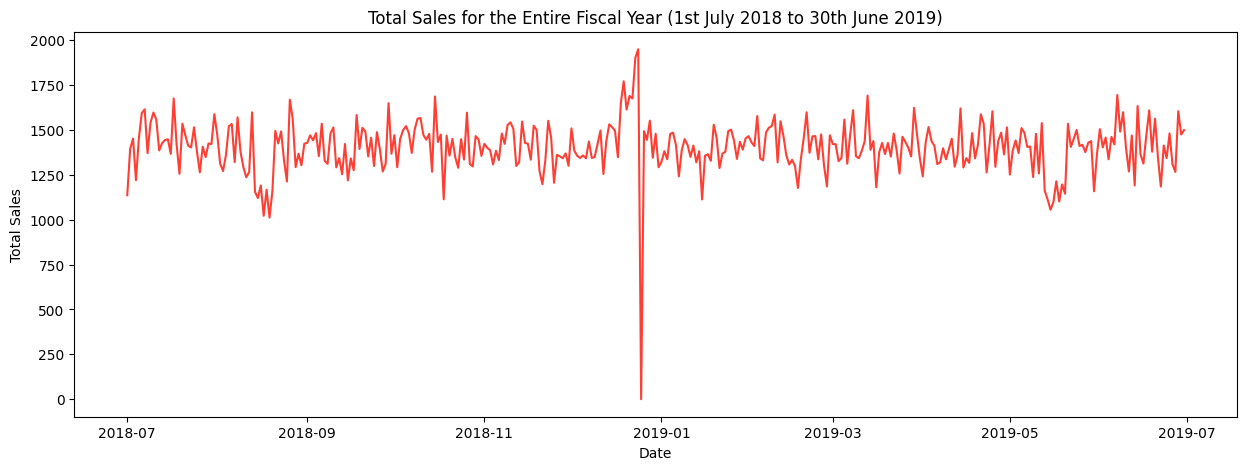

In [46]:
# Assuming "date_sales" is a DataFrame

plt.figure(figsize=(15, 5))
sns.lineplot(data=date_sales, x="DATE", y="TOT_SALES", color="#ff3f34")  # Pass data as a single argument
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

As we can see from the line graph, the sales drop to zero on a certain date, which is 25th December 2018 — Christmas Day, which we manually set to zero. However, the sales also reached an all-time high right before that, so we would need to analyse the transaction data for December 2018 to find out more about the sales.

**Analysing the sales for December 2018**

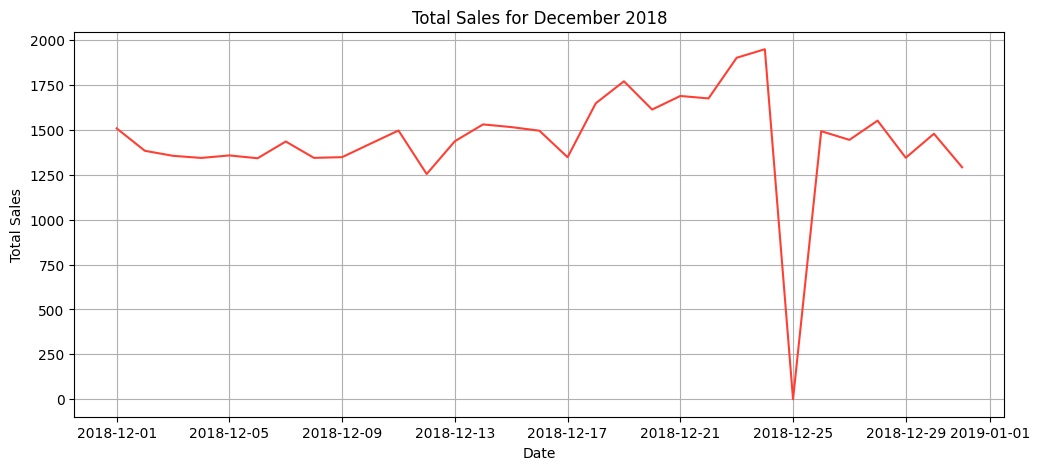

In [47]:
# Assuming "date_sales" is a DataFrame with a datetime "DATE" column

# Filter data for December 2018
filtered_data = date_sales.loc[(date_sales["DATE"].dt.year == 2018) & (date_sales["DATE"].dt.month == 12)]

# Create the line plot with Seaborn

plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_data, x="DATE", y="TOT_SALES", color="#ff3f34")

plt.title("Total Sales for December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)  # Add grid lines for better readability (optional, as Seaborn often uses grids by default)
plt.show()

As suspected, the sales reached an all-time high the day before Christmas Day, which makes sense because people tend to purchase food items more when approaching holiday season. We can also see a consistent rise in the line graph between 21st December and 24th December, which means that these are the dates the store could target with promotions and discounts to increase the sales even more.


**Analysing the sales during vacation i.e, between 21-12-2018 to 24-12-2018**

In [48]:
#   Extracting entries for the dates between 21st December 2018 and 24th December 2018.
holiday_sales=merged_data[(merged_data["DATE"]>="2018-12-21") & (merged_data["DATE"]<="2018-12-24")]  
#   Sorting the pandas.DataFrame in ascending order of the TOT_SALES column.
holiday_sales=holiday_sales.sort_values(by="TOT_SALES") 
#   Resetting the index of the pandas.DataFrame.
holiday_sales=holiday_sales.reset_index(drop=True)  
holiday_sales

,BRAND_NAME,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,YEAR,MONTH,DAY,WEEKDAY,LIFESTAGE,PREMIUM_CUSTOMER
0,WW,WW Original Stacked Chips,1,1.9,160.0,2018-12-24,186,186132,188533,96,2018.0,12.0,24.0,Monday,YOUNG SINGLES/COUPLES,Premium
1,WW,WW Original Stacked Chips,1,1.9,160.0,2018-12-22,44,44232,40380,96,2018.0,12.0,22.0,Saturday,YOUNG FAMILIES,Budget
2,WW,WW D/Style Chip Sea Salt,1,1.9,200.0,2018-12-24,18,18256,15493,83,2018.0,12.0,24.0,Monday,RETIREES,Mainstream
3,WW,WW Sour Cream &OnionStacked Chips,1,1.9,160.0,2018-12-24,41,41118,38034,21,2018.0,12.0,24.0,Monday,YOUNG SINGLES/COUPLES,Mainstream
4,WW,WW Supreme Cheese Corn Chips,1,1.9,200.0,2018-12-22,41,41423,38390,27,2018.0,12.0,22.0,Saturday,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,Smiths,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380.0,2018-12-22,104,104002,103701,14,2018.0,12.0,22.0,Saturday,MIDAGE SINGLES/COUPLES,Mainstream
1039,Smiths,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380.0,2018-12-22,180,180114,181731,14,2018.0,12.0,22.0,Saturday,OLDER SINGLES/COUPLES,Budget
1040,Smiths,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380.0,2018-12-21,40,40156,36836,14,2018.0,12.0,21.0,Friday,OLDER FAMILIES,Premium
1041,Smiths,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380.0,2018-12-21,130,130318,134984,14,2018.0,12.0,21.0,Friday,OLDER SINGLES/COUPLES,Premium


**Total Sales by Brands During 21st December 2018 to 24th December 2018**.



In [49]:
#   Grouping the pandas.DataFrame by the TOT_SALES column for each brand, and sorting it in descending order of the TOT_SALES column.
holiday_brands=holiday_sales.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)  
 #   Resetting the index of the pandas.DataFrame.
holiday_brands=holiday_brands.reset_index(drop=True)   
holiday_brands

,BRAND_NAME,TOT_SALES
0,Doritos,1841.8
1,Smiths,1742.9
2,Thins,1343.1
3,Cobs,972.8
4,Natural,507.0


We can see that Doritos was the highest-selling brand during the holiday season, so it'd be wise to surround promotions and discounts around it to drive sales even more.
Let's see if our holiday season statistics match with the ones during the entire duration of the recorded sales.

**Analyse the Total Sales by Pack Size**

In [50]:
package_sale = merged_data.groupby("PACK_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)
package_sale = package_sale.reset_index(drop=True)
package_sale

,PACK_SIZE,TOT_SALES
0,175.0,183172.3
1,170.0,112396.4
2,110.0,70569.8
3,150.0,47622.9
4,380.0,36367.6
5,330.0,34804.2
6,200.0,16007.5
7,160.0,10647.6
8,0.0,0.0


We can see that Doritos was the highest-selling brand during the holiday season . Overall Smiths is the highest selling brand, so it'd be wise to surround promotions and discounts around it to drive sales even more.

Let's see if our holiday season statistics match with the ones during the entire duration of the recorded sales.

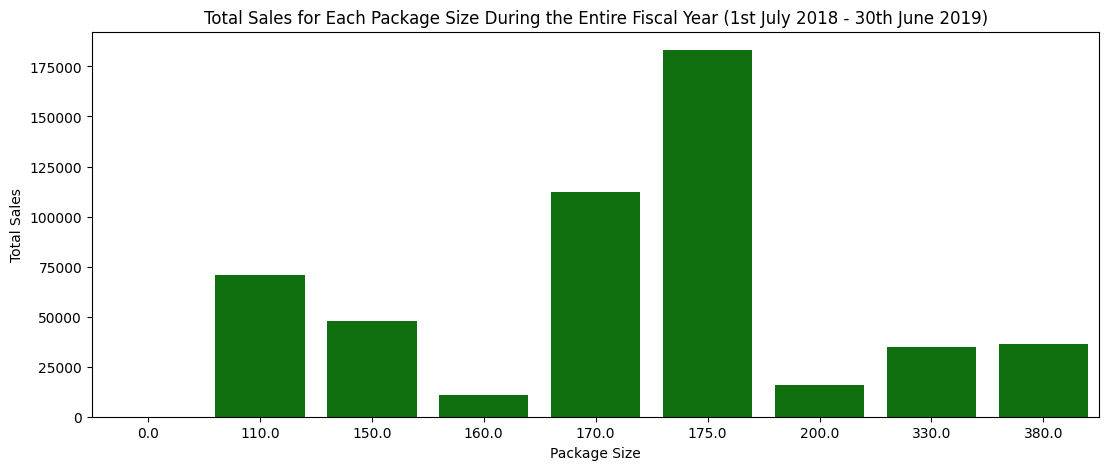

In [51]:
#   Plotting a bar graph of the total sales for each package size during the entire recorded duration.

plt.figure(figsize=(13, 5))
sns.barplot(x="PACK_SIZE", y="TOT_SALES", data=package_sale, color="Green")
plt.title("Total Sales for Each Package Size During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

As we can see, the 175 gramme package size was the highest-selling one over the entire duration of the recorded sales, and even that by nearly 37% from the second highest-selling package size. Hence, it's clear that the 175 gramme package size is a customer favourite!

Likewise, we can also check for the highest-selling brands during the entire duration of the recorded sales.

**Highest Sales by Brands**

In [52]:
brands_sales=merged_data.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)  #   Grouping the pandas.DataFrame by the TOT_SALES column for the top five brands, and sorting it in descending order of the TOT_SALES column.
brands_sales=brands_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
brands_sales

,BRAND_NAME,TOT_SALES
0,Smiths,129237.8
1,Doritos,127597.3
2,Thins,88852.5
3,Cobs,70569.8
4,Natural,34272.0


Smiths remained the highest-selling brand during the entire duration of the recorded sales.

**Statistical Description of PACK_SIZE**

In [53]:
merged_data["PACK_SIZE"].astype('float').describe()

count    74571.000000
mean       179.812729
std         59.021258
min          0.000000
25%        160.000000
50%        175.000000
75%        175.000000
max        380.000000
Name: PACK_SIZE, dtype: float64

With the brand and product analysis done, we can move onto the customer analysis now. The first part would be analyse which sort of customers are the most loyal to the store, which would also be the ones that have the most purchases from it.

**Count and Sales of Product Consumption during LIFESTAGE**

In [54]:
#   Finding the number of entries for each entry in the LIFESTAGE column in the pandas.DataFrame.
merged_data["LIFESTAGE"].value_counts()   

LIFESTAGE
OLDER SINGLES/COUPLES     15304
RETIREES                  13835
OLDER FAMILIES            13782
YOUNG FAMILIES            12420
YOUNG SINGLES/COUPLES     10201
MIDAGE SINGLES/COUPLES     7104
NEW FAMILIES               1924
None                          1
Name: count, dtype: int64

In [55]:
 #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage, and sorting it in descending order of the TOT_SALES column.
customer_sales=merged_data.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(7)
#   Resetting the index of the pandas.DataFrame.
customer_sales=customer_sales.reset_index(drop=True)   
customer_sales

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,105931.2
1,RETIREES,95448.3
2,OLDER FAMILIES,94413.8
3,YOUNG FAMILIES,85164.7
4,YOUNG SINGLES/COUPLES,68446.4
5,MIDAGE SINGLES/COUPLES,49138.1
6,NEW FAMILIES,13045.8


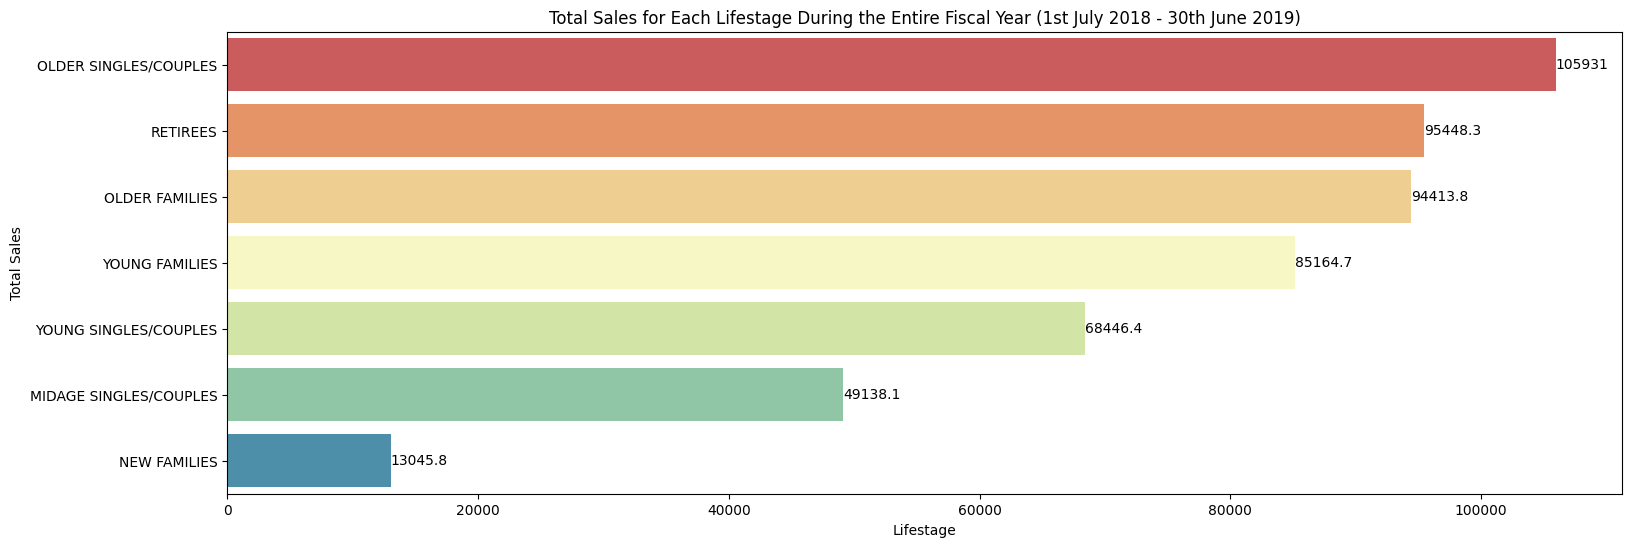

In [56]:
#   Plotting a bar graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(18, 6))
ax=sns.barplot(y="LIFESTAGE", x="TOT_SALES", data=customer_sales, hue ="LIFESTAGE" , palette="Spectral")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.show()

It seems like OLDER SINGLES/COUPLES are the most loyal customers of the store and NEW FAMILIES are the least. Interestingly, we can see a decreasing trend of purchases according to age in the first half of the bar graph, with customers that are the most likely to spend the most time at home also having the most purchases, even though snack items wouldn't logically be associated with an age demographic.

**Total Sales by LIFESTAGE by Date**

In [57]:
#   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and date.
lifestage_sales=merged_data.groupby(["LIFESTAGE", "DATE"])["TOT_SALES"].sum().reset_index() 
#   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_sales=lifestage_sales[lifestage_sales["LIFESTAGE"]!="None"] 
lifestage_sales

,LIFESTAGE,DATE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,2018-07-01,99.0
1,MIDAGE SINGLES/COUPLES,2018-07-02,195.3
2,MIDAGE SINGLES/COUPLES,2018-07-03,159.9
3,MIDAGE SINGLES/COUPLES,2018-07-04,221.2
4,MIDAGE SINGLES/COUPLES,2018-07-05,108.9
...,...,...,...
2543,YOUNG SINGLES/COUPLES,2019-06-26,175.5
2544,YOUNG SINGLES/COUPLES,2019-06-27,212.7
2545,YOUNG SINGLES/COUPLES,2019-06-28,208.6
2546,YOUNG SINGLES/COUPLES,2019-06-29,249.8


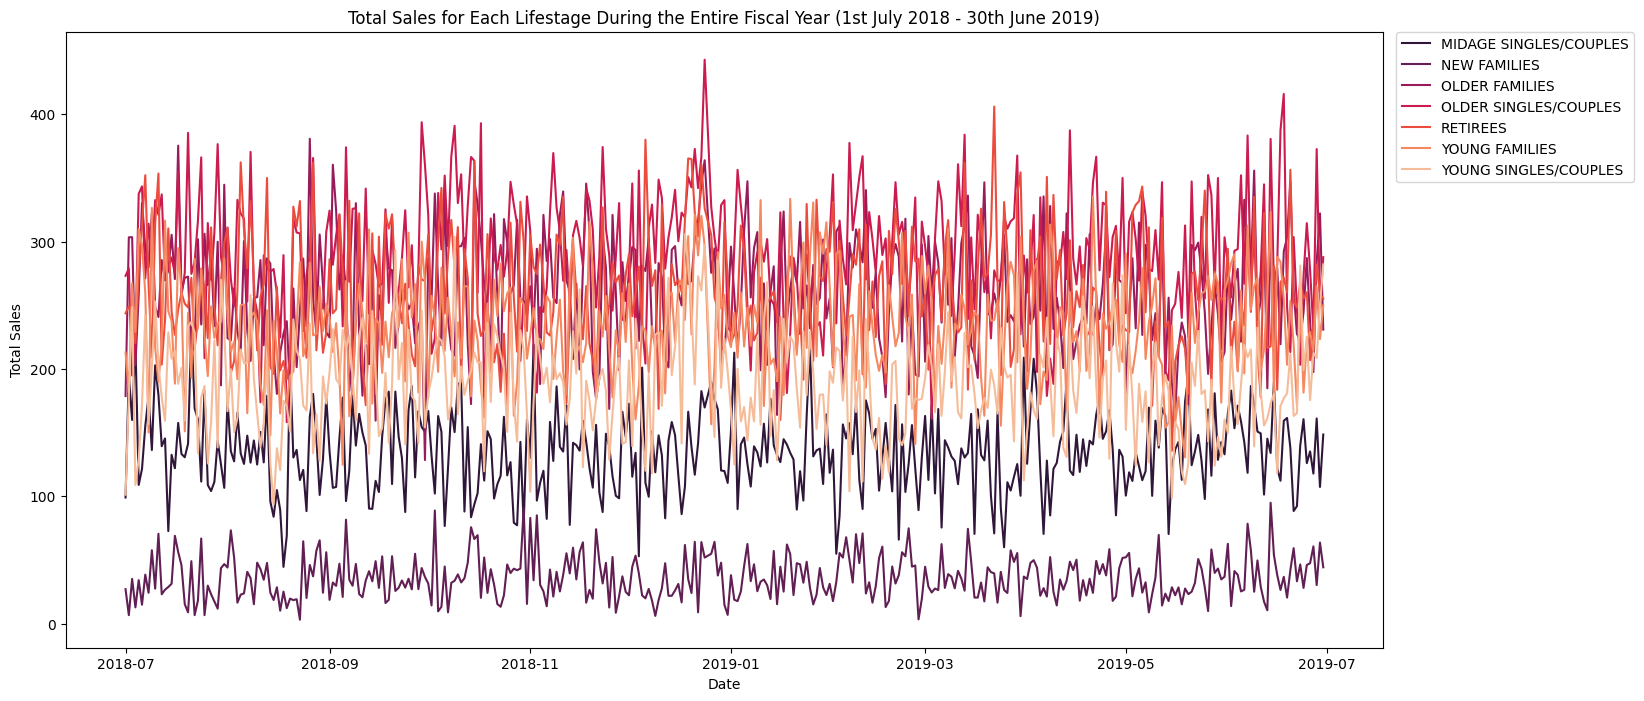

In [58]:
#   Plotting a multi-line graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(17, 8))
sns.lineplot(x="DATE", y="TOT_SALES", hue="LIFESTAGE", data=lifestage_sales, palette="rocket")
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

Like the holiday season statistics, we can see an increase in sales right before Christmas Day for all age demographics, except NEW FAMILIES, which remains consistent throughout the entire recorded duration. As new families are more inclined toward their careers and developing their newly established home, it's unlikely for them to spend on snack items frequently.

Let's see what sort of purchase behaviour each age demographic has!

**Total Sales on the Basis of PREMIUM_CUSTOMER and LIFESTAGE**

In [59]:
#   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and customer segment, 
# and sorting it in descending order of the TOT_SALES column.
lifestage_segment=merged_data.groupby(["LIFESTAGE", 
                                       "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", 
                                                                                                             "TOT_SALES"], ascending=[True, False]) 
#   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_segment=lifestage_segment[lifestage_segment["LIFESTAGE"]!="None"] 
#   Resetting the index of the pandas.DataFrame.
lifestage_segment=lifestage_segment.reset_index(drop=True)  
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,23950.4
1,MIDAGE SINGLES/COUPLES,Premium,15349.4
2,MIDAGE SINGLES/COUPLES,Budget,9838.3
3,NEW FAMILIES,Budget,5651.4
4,NEW FAMILIES,Mainstream,4307.1
5,NEW FAMILIES,Premium,3087.3
6,OLDER FAMILIES,Budget,44859.2
7,OLDER FAMILIES,Mainstream,28298.5
8,OLDER FAMILIES,Premium,21256.1
9,OLDER SINGLES/COUPLES,Budget,35943.0


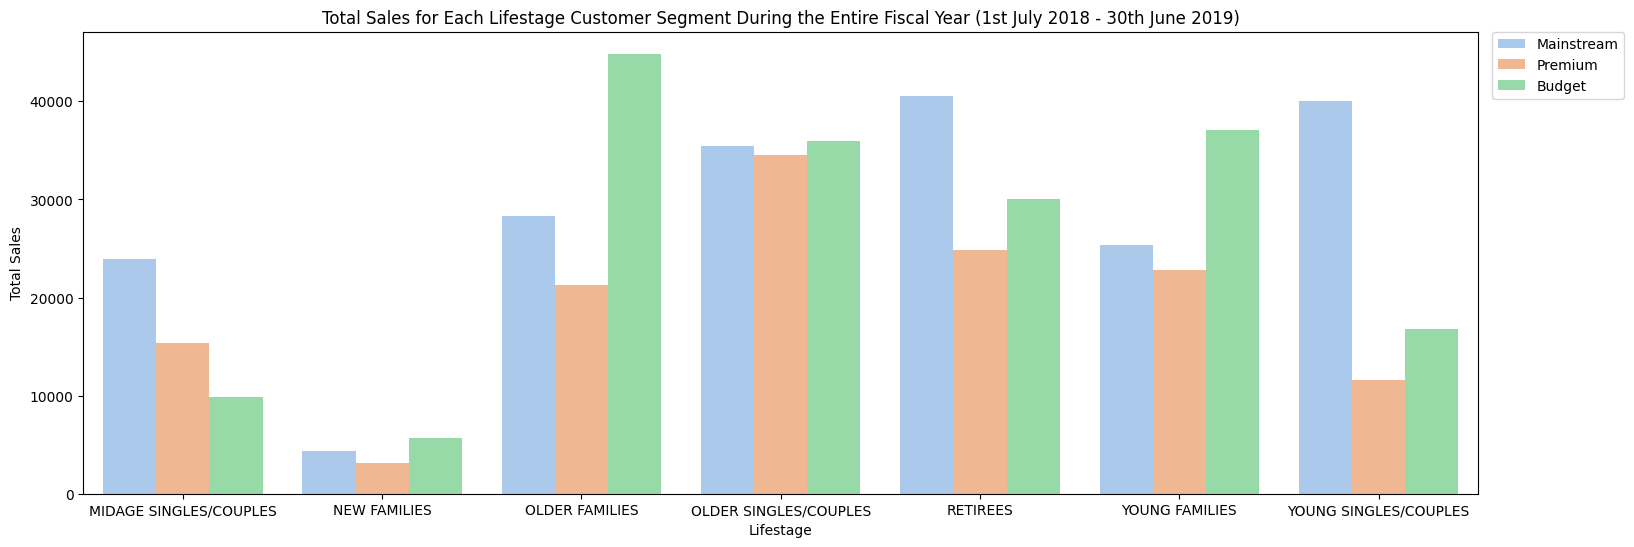

In [60]:
#   Plotting a bar graph of the total sales for each lifestage and whether it is a Premium, Mainstream, or Budget customer 
# during the entire recorded duration.

plt.figure(figsize=(18, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=lifestage_segment, palette="pastel")
plt.title("Total Sales for Each Lifestage Customer Segment During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

We can see that MIDAGE SINGLES/COUPLES had the highest Mainstream and Premium purchases of all their purchases, while all the others had the least Premium purchases, which means that this would be the age demographic to target for payment plans and promotions to drive sales even more since they're more likely to pay more per packet of chips than the others.

Now that we know which age demographic the store should target to drive sales more, let's find which brand and package size each customer segment for MIDAGE SINGLES/COUPLES is the most inclined to.

**Brand and package size each customer segment for MIDAGE SINGLES/COUPLES is the most inclined to**

In [61]:
#   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and brand, and sorting it in descending order of the TOT_SALES column.
lifestage_brands=merged_data.groupby(["LIFESTAGE", 
                                      "BRAND_NAME", "PREMIUM_CUSTOMER", 
                                      "PACK_SIZE"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])  
 #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_brands=lifestage_brands[lifestage_brands["LIFESTAGE"]!="None"]   
 #   Resetting the index of the pandas.DataFrame.
lifestage_brands=lifestage_brands.reset_index(drop=True)   
#   Storing the entries for MIDAGE SINGLES/COUPLES into a separate pandas.DataFrame.
midage=lifestage_brands[lifestage_brands["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]   
midage

,LIFESTAGE,BRAND_NAME,PREMIUM_CUSTOMER,PACK_SIZE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Thins,Mainstream,175.0,4002.9
1,MIDAGE SINGLES/COUPLES,Doritos,Mainstream,170.0,3885.2
2,MIDAGE SINGLES/COUPLES,Cobs,Mainstream,110.0,3613.8
3,MIDAGE SINGLES/COUPLES,Thins,Premium,175.0,2593.8
4,MIDAGE SINGLES/COUPLES,Doritos,Mainstream,150.0,2371.2
5,MIDAGE SINGLES/COUPLES,Doritos,Premium,170.0,2301.2
6,MIDAGE SINGLES/COUPLES,Smiths,Mainstream,330.0,2103.3
7,MIDAGE SINGLES/COUPLES,Cobs,Premium,110.0,2071.0
8,MIDAGE SINGLES/COUPLES,Smiths,Mainstream,380.0,1976.5
9,MIDAGE SINGLES/COUPLES,Thins,Budget,175.0,1673.1


With this, we can see that MIDAGE SINGLES/COUPLES prefer Thins and 175 gramme package size the most in both the Mainstream and Premium customer segment.